In [12]:
import numpy as np
import matplotlib.pyplot as plt
 
np.random.seed(0)

In [43]:
def get_volt():
    """전압 평균"""
    v = np.random.normal(0, 4)  # v: 잡음 평균(노이즈)
    volt_mean = 14.4            # volt_mean: 측정하는 전압의 평균(기준값)
    volt_meas = volt_mean + v   # volt_meas: 식별가능한 전압 평균 [V] (기준값 + 잡음)
    return volt_meas

def avg_filter(k, x_meas, x_avg):
    """평균필터 사용하여 전압 평균 계산"""
    alpha = (k - 1) / k
    x_avg = alpha * x_avg + (1 - alpha) * x_meas
    return x_avg


In [44]:
# Input parameters. (측정시간, 측정간격)
time_end = 10
dt = 0.2

time = np.arange(0, time_end, dt)
n_samples = len(time)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)


x_avg = 0
for i in range(n_samples):
    k = i + 1
    x_meas = get_volt()
    x_avg = avg_filter(k, x_meas, x_avg)
 
    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg

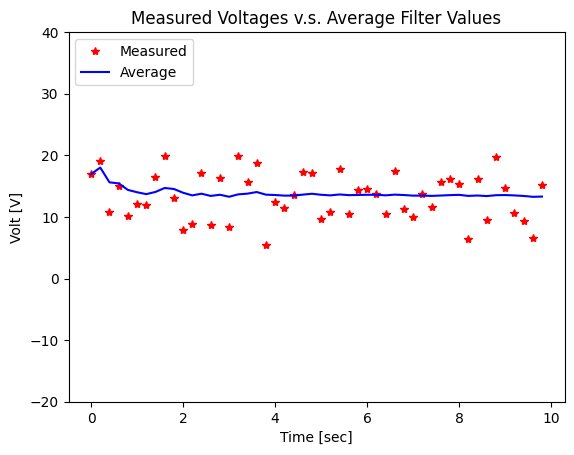

In [52]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_avg_save, 'b-', label='Average')
plt.legend(loc='upper left')
plt.title('Measured Voltages v.s. Average Filter Values')
plt.xlabel('Time [sec]')
plt.ylabel('Volt [V]')
plt.ylim(-20,40)
plt.show()

[  1.   1.   3.   2.   3.  10.  11.  10.  21.  32.  48.  34.  73. 111.
 123. 193. 227. 259. 333. 417. 459. 469. 528. 596. 600. 651. 633. 624.
 547. 516. 474. 455. 349. 289. 210. 166. 154. 105.  82.  54.  45.  23.
  22.  14.   8.  11.   0.   1.   1.   2.] [-15.97184427 -15.34809986 -14.72435546 -14.10061105 -13.47686664
 -12.85312223 -12.22937782 -11.60563341 -10.981889   -10.3581446
  -9.73440019  -9.11065578  -8.48691137  -7.86316696  -7.23942255
  -6.61567814  -5.99193374  -5.36818933  -4.74444492  -4.12070051
  -3.4969561   -2.87321169  -2.24946728  -1.62572288  -1.00197847
  -0.37823406   0.24551035   0.86925476   1.49299917   2.11674358
   2.74048798   3.36423239   3.9879768    4.61172121   5.23546562
   5.85921003   6.48295444   7.10669884   7.73044325   8.35418766
   8.97793207   9.60167648  10.22542089  10.8491653   11.4729097
  12.09665411  12.72039852  13.34414293  13.96788734  14.59163175
  15.21537616] <BarContainer object of 50 artists>


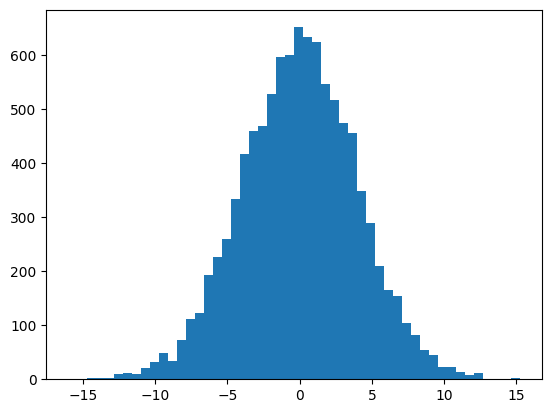

In [38]:
rand_norm = np.random.normal(0., 4., 10000)
# plt.hist(rand_norm, 100, False)
count, bins, ignored = plt.hist(rand_norm, 50)
print(count, bins, ignored)
plt.show()